<a href="https://colab.research.google.com/github/ProfAI/machine-learning-modelli-e-algoritmi/blob/main/5%20-%20Reti%20Neurali/neural_networks_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Classificazione di cifre scritte a mano
In questa esercitazione dovrai addestrare un modello di rete neurale artificiale in grado di riconoscere cifre scritte a mano. <br/>
Puoi scaricare il dataset da utilizzare dall'[UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/optical+recognition+of+handwritten+digits). I file sono [optdigits.tra](https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra) per il train set e [optdigits.tes](https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tes) per il test set.
Riesci a comprendere il formato di questi file? Ma certo! Dopo averlo fatto, utilizzali per addestrare un multilayer perceptron, questo modello era effettivamente la scelta migliore?

### Scarichiamo i dati

In [1]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tes

--2023-01-13 15:41:05--  https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 563639 (550K) [application/x-httpd-php]
Saving to: ‘optdigits.tra’

optdigits.tra       100%[===================>] 550.43K  1.57MB/s    in 0.3s    

2023-01-13 15:41:06 (1.57 MB/s) - ‘optdigits.tra’ saved [563639/563639]

--2023-01-13 15:41:06--  https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tes
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 264712 (259K) [application/x-httpd-php]
Saving to: ‘optdigits.tes’

optdigits.tes       100%[===================>] 258.51K   940KB/s  

### Importiamo i moduli

In [32]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

### Definiamo le funzioni

In [18]:
RANDOM_SEED = 0

### Carichiamo i dati

In [6]:
from numpy import genfromtxt

arr = genfromtxt('optdigits.tra', delimiter=',')
arr.shape

(3823, 65)

4.0


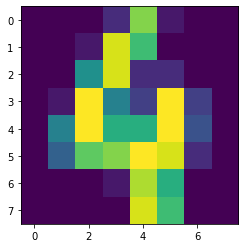

In [68]:
sample_num = 100
print(arr[sample_num,-1])
plt.imshow(arr[sample_num,:-1].reshape(8,8))

### Processiamo i dati

In [13]:
X = arr[:,:-1]
y = arr[:,-1]

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=RANDOM_SEED)

In [49]:
x_max = X_train.max()
X_train/=x_max
X_test/=x_max

### Multilayer Perceptron

In [65]:
mlp = MLPClassifier(random_state=RANDOM_SEED)
mlp.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=0)

In [67]:
mlp.score(X_test, y_test)

0.9764705882352941

In [28]:
y_pred = mlp.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        81
         1.0       0.97      1.00      0.99        76
         2.0       1.00      0.97      0.99        76
         3.0       0.97      1.00      0.99        75
         4.0       0.97      0.97      0.97        72
         5.0       1.00      0.94      0.97        71
         6.0       0.94      0.99      0.96        76
         7.0       1.00      1.00      1.00        75
         8.0       0.97      0.96      0.97        80
         9.0       0.95      0.96      0.96        83

    accuracy                           0.98       765
   macro avg       0.98      0.98      0.98       765
weighted avg       0.98      0.98      0.98       765



### Regressione Logistica

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)